## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# read csv file
df = pd.read_csv('ab_data.csv')

# first overview of data
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.unique().shape[0]

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# to calculate the number of mismatches 
# 1. create two subsets, each containing one of the possible mismatches
# 2. sum up the number of rows of each mismatch possibility to get the total number of mismatches

# create a subset of the dataframe containing the mismatch 1: landing_page=="new_page" & group=="control"
df_mismatch1=df.query('landing_page=="new_page" & group=="control"')
# create a subset of the dataframe containing the mismatch 2: landing_page=="old_page" & group=="treatment"
df_mismatch2=df.query('landing_page=="old_page" & group=="treatment"')

# print result
print('The total number of mismatches is: {}'.format(df_mismatch1.shape[0] + df_mismatch2.shape[0]))

The total number of mismatches is: 3893


f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# combine both mismatch data frames
df_mismatch = df_mismatch1.append(df_mismatch2)

#create data frame df2 without the mismatches
df2 = df.drop(df_mismatch.index)

In [9]:
# Check if the mismatching rows have been removed
# performing same query as above for df2 and summing up all mismatches
# create a subset of the dataframe containing the mismatch 1: landing_page=="new_page" & group=="control"
df2_mismatch1=df2.query('landing_page=="new_page" & group=="control"')
# create a subset of the dataframe containing the mismatch 2: landing_page=="old_page" & group=="treatment"
df2_mismatch2=df2.query('landing_page=="old_page" & group=="treatment"')
# print result
print('The total number of df2 mismatches is: {}'.format(df2_mismatch1.shape[0] + df2_mismatch2.shape[0]))

The total number of df2 mismatches is: 0


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print('Data frame df2 has {} unique user_ids.'.format(df.user_id.unique().shape[0]))

Data frame df2 has 290584 unique user_ids.


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop(2893)
sum(df2.user_id.duplicated())

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2[df2.group == 'control'].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2[df2.group == 'treatment'].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
df2[df2.landing_page=='new_page'].shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Due to the fact that the probability of the treatment group to convert is in the same magnitude than the one from the control group, in absolute values:**

- a probability of 11.88% for the treatment group to convert compared with
- a probability of 12.03% for the control group to convert

**I see no clear evidence that one of both pages will lead to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_{0}: p_{new} <= p_{old}$$ <br>
$$H_{1}: p_{new} > p_{old}$$ <br>

**$p_{new}$ and $p_{old}$ are the converted rates for the new page, respectively the old page.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2['converted'].mean();
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df2['converted'].mean();
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new])
new_page_converted.mean()

0.11992980524396119

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])
old_page_converted.mean()

0.12157027410273001

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

-0.001640468858768826

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

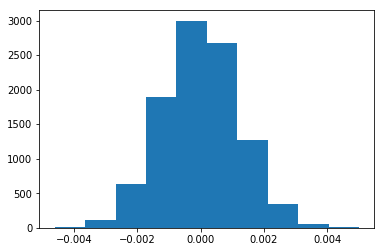

In [26]:
# plot histogram of p_diffs
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
# calculate actual difference observed in csv file and save it as diff_act
diff_act = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
diff_act

-0.0015782389853555567

In [28]:
# calculate p_value by comparing p_diffs with actual difference observed in csv file
p_value = (p_diffs > diff_act).mean()
p_value

0.90390000000000004

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The calculated value in task j. is called "p_value". <br>**
**The p_value is the probability of observing your results (or more extrem ones) under the condition that the null hypothesis is true. <br>**
**Having a high p_value indicates that we fail in rejecting the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"').converted.sum() # number of "converted" values in control group
convert_new = df2.query('group == "treatment"').converted.sum() # # number of "converted" values in treatment group
n_old = df2.query('landing_page == "old_page"').shape[0] # number of rows associated with old_page
n_new = df2.query('landing_page == "new_page"').shape[0] # number of rows associated with new_page

convert_old

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [30]:
counts = [convert_old, convert_new];
nobs = [n_old, n_new];

z_stat, p_value = sm.stats.proportions_ztest(counts, nobs, alternative='smaller') # choose alternative "smaller" due to the definition of the alternative hypothesis

print('z value is {}'.format(z_stat))
print('p value is {}'.format(p_value))

z value is 1.3109241984234394
p value is 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p_value is the probability of observing your results (or more extrem ones) under the condition that the null hypothesis is true. <br>
In this example the null typothesis is that that the converted rates of the old page is higher or equal to the converted rates of the new page. <br>
The p_value calculated in this section is pretty close to the value of the previous section and is about p_value~0.905. <br>
Based on this high p_value, it is indicated that we fail in rejecting the null hypothesis.**

**The z-value describes the "distance" of our data to the mean, in units of standard deviations. <br>
Based on our null hypothesis is this task we are working with an upper-tailed z-test. <br>
Assuming a confidence interval of 95% (1.65x std) and comparing these two values, we see that the z-value (1.311) is not exceeding this value:<br>
$|z|=1.311 < 1.65$ <br>
Therefore, also using the z-value, we are failing in rejecting the null hypothesis.**


#### Reference Part II: A/B Test
numpy random choice: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html <br>
z-test 1: https://en.wikipedia.org/wiki/Z-test <br>
z-test 2: http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_HypothesisTest-Means-Proportions/BS704_HypothesisTest-Means-Proportions3.html <br>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since each row is either a conversion or no conversion, we are dealing with a binary problem.** <br>
**So the best type of regression to our problem set is a Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
# add intercept column to df2
df2['intercept'] = 1

In [32]:
# add column new_page with 1 for the landing_page=new_page and o for the anding_page=old_page
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page']); # create dummy data for all unqiue values in landing_page
df2.drop(['old_page'], axis = 1, inplace=True) # remove column "old_page", because it is not necessary

In [33]:
# add column ab_page with 1 when an individual receives the treatment and 0 if control
df2[['control','ab_page']] = pd.get_dummies(df2['group']); # create dummy data for all unqiue values in group
df2.drop(['control'], axis = 1, inplace=True) # remove column "control", because it is not necessary

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [34]:
# create logistic regression
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-21 18:25 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page and calculated in this section has the value 0.19.** <br>

**In Part II, the calculated p-value was about 0.9. But it refers to an one-tailed test. In Part II, I calculated the p-value for the null hypothesis that the old page would convert more or equal than the new page.** <br>
$H_{0}: p_{new} <= p_{old}$ <br>
$H_{1}: p_{new} > p_{old}$ <br>

**In Part III, I wrote as an answer to question a) that this is about a binary problem, therefore the hypothesis is different:** <br>
$H_{0}: p_{new} = p_{old}$ <br>
$H_{1}: p_{new} \ne p_{old}$ <br>
**This means that the regression model in Part III is set up as two-tailed test.**

**as before, $p_{new}$ and $p_{old}$ are the converted rates for the new page, respectively the old page.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It could be a good idea to consider other factors being added to the regression model. For example the time or day of the week (or more general date) of an user could have an impact. In addition one could about checking and taking care of outliers of the data.** <br>
**A disadvantage could be that some variables may effect each other and the whole regression model gets more complex.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
# load countries file
df_countries = pd.read_csv('countries.csv')
# check data
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [37]:
# check unique entries in column "country"
df_countries.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [38]:
# prepare data frame

In [39]:
# 1.) create dummies for unique countries
dummies_countries = pd.get_dummies(df_countries['country']);

In [40]:
# 2.) add dummy columns to data frame
df_countries = df_countries.join(dummies_countries)

In [41]:
# 3.) use column "UK" as baseline and delete it
df_countries = df_countries.drop('UK', axis=1)

In [42]:
# 4.) check data frame
df_countries.head()

,user_id,country,CA,US
0,834778,UK,0,0
1,928468,US,0,1
2,822059,UK,0,0
3,711597,UK,0,0
4,710616,UK,0,0


In [43]:
# combine dataframes df2 and df_countries to df3
df3 = df2.set_index('user_id').join(df_countries.set_index('user_id'))
# check df3
df3.head()

,timestamp,group,landing_page,converted,intercept,new_page,ab_page,country,CA,US
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,US,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,US,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,US,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,US,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,US,0,1


In [44]:
# Logistic Regression fit

# create column "intercept"
df3['intercept']=1
# create regression model logit, perform logit fit, show results
logit_mod1 = sm.Logit(df3['converted'], df3[['intercept', 'CA', 'US']])
# perform fit
results = logit_mod1.fit()
# show results
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-21 18:25 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9868    0.0114  -174.1736  0.0000  -2.0092  -1.9645
CA           -0.0507    0.0284    -1.7863  0.0740  -0.1064   0.0049
US           -0.0099    0.0133    -0.7458  0.4558  -0.0360   0.0161
==================================================================

"""

**The summary showed that the p-values of 0.074 (CA) and 0.4558 (US) for both countries are higher than 0.05.** <br> **Therefore, I see no statistical evidence that the country had an impact on conversion.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [45]:
# add columns for the interaction between page and country
df3['US_ab_page'] = df3['US'] * df3['ab_page']
df3['CA_ab_page'] = df3['CA'] * df3['ab_page']

In [46]:
# Logistic Regression fit

# create regression model logit, perform Logit fit, show results
logit_mod2 = sm.Logit(df3['converted'], df3[['intercept', 'CA', 'US', 'ab_page', 'US_ab_page', 'CA_ab_page']])
# perform fit
results2 = logit_mod2.fit()
# show results
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-21 18:25 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
CA           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
US            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
US_ab_page   -0.0314    0.0266    -1.1807  0.2377  -0.0835   0.0207
CA_ab_page   -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
==================================================================

"""

**The additional p-values here are (0.77, 0.76, 0.63, 0.24, 0.17) for (CA, US, ab_page, US_ab_page, CA-ab_page) which are again all bigger than 0.05.** <br>
**Therefore, also by addig the interaction term, here is again no statistical evidence given that there are significant effects on conversion.** <br>

#### References: 
One- and two-tailed tests: https://en.wikipedia.org/wiki/One-_and_two-tailed_tests <br>
Pandas set_index: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html <br>
Logit summary problem: https://knowledge.udacity.com/questions/99276

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0